# libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score


from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from collections import Counter

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [517]:
data=pd.read_csv(r"C:\Users\marwa\OneDrive\Desktop\diabetes_prediction_dataset.csv")

In [518]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [519]:
data.shape

(100000, 9)

# loading data

# Data exploration

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [522]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [523]:
data.duplicated().sum()


3857

In [524]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [525]:
data.shape

(96143, 9)

In [526]:
values_to_replace = {
    'Female': 0,
    'Male': 1,
    # Add more replacements as needed
}
data = data.replace(values_to_replace)


In [527]:
values_to_replace = {
    'never': 0,
    'No Info': 1,
    'current':2,
    'former':3,
    'ever':4,
    'not current':5
    # Add more replacements as needed
}
data = data.replace(values_to_replace)


In [528]:
data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


In [529]:
print(data[data['blood_glucose_level']==0].shape[0])
print(data[data['HbA1c_level']==0].shape[0])
print(data[data['bmi']==0].shape[0])


0
0
0


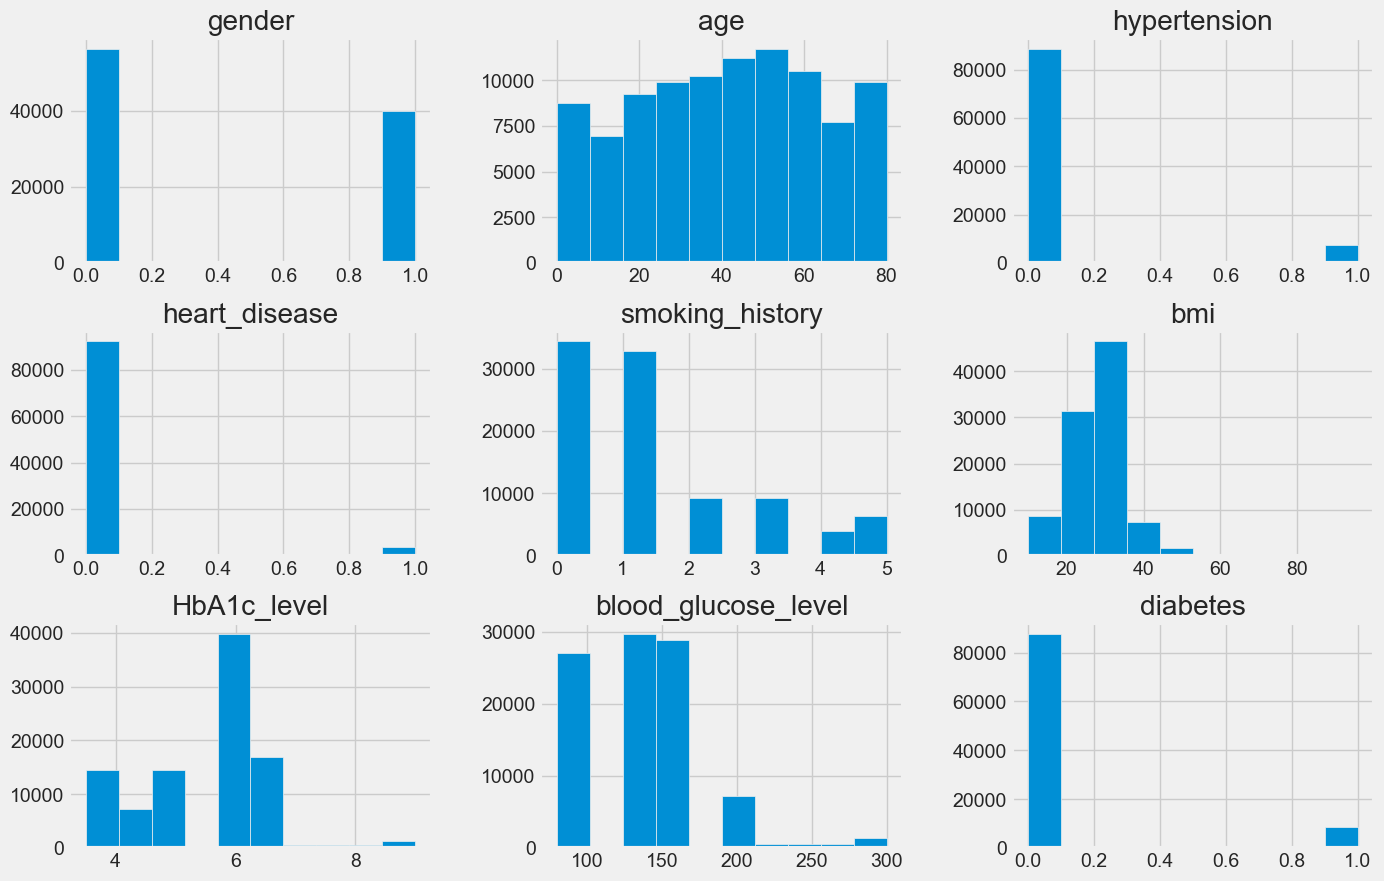

In [530]:
data.hist(bins=10,figsize=(15,10))
plt.show()

In [531]:
#data['blood_glucose_level']=data['blood_glucose_level'].replace(0,data['blood_glucose_level'].mean())
#data['HbA1c_level']=data['HbA1c_level'].replace(0,data['HbA1c_level'].mean())
#data['bmi']=data['bmi'].replace(0,data['bmi'].median())


# Analysis

<Axes: >

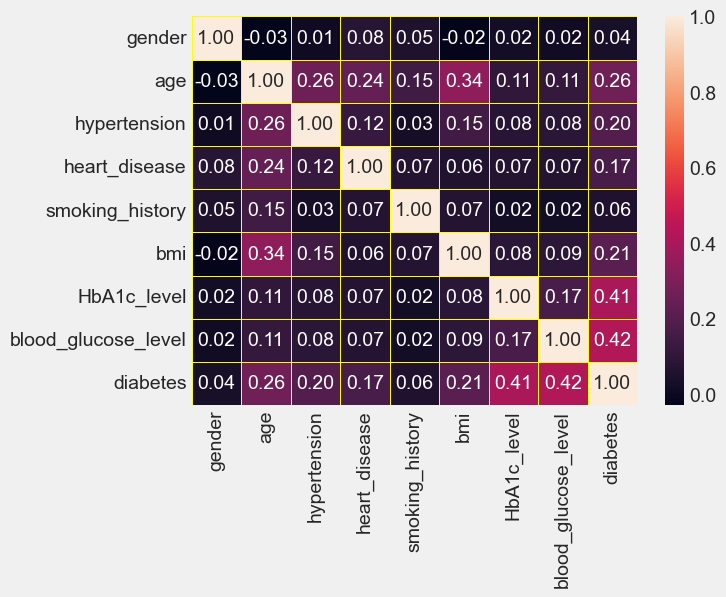

In [532]:
sns.heatmap(data.corr(),annot=True,fmt='.2f',linewidths=0.5,linecolor='yellow')

In [ ]:
maxi=data[data['diabetes']==0]
mini=data[data['diabetes']==1]
maxi.shape  ,mini.shape

((87661, 9), (8482, 9))

In [534]:
#plt.figure(figsize=(20,10))
#sns.set_style(style='whitegrid')
#plt.subplot(3,3,1)
#sns.boxplot(x='Glucose',data=data)
#plt.subplot(3,3,2)
#sns.boxplot(x='BloodPressure',data=data) 
#plt.subplot(3,3,3)
#sns.boxplot(x='BMI',data=data)
#plt.subplot(3,3,4)
#sns.boxplot(x='Age',data=data)
#plt.subplot(3,3,5)
#sns.boxplot(x='SkinThickness',data=data)
#plt.subplot(3,3,6)
#sns.boxplot(x='Insulin',data=data)
#plt.subplot(3,3,6)
#plt.show()

In [535]:
x=data.drop('diabetes',axis=1)
y=data['diabetes']

In [536]:
rm=RandomUnderSampler(random_state=41)
x_res,y_res=rm.fit_resample(x,y)

In [537]:
print('old data set shape{}'.format(Counter(y)))
print('old data set shape{}'.format(Counter(y_res)))

old data set shapeCounter({0: 87661, 1: 8482})
old data set shapeCounter({0: 8482, 1: 8482})


In [538]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.2,random_state=41,shuffle=True)

# Model

In [539]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [540]:
model1=LogisticRegression()
model2=SVC(kernel='linear', probability=True)
model3=KNeighborsClassifier()
model4=DecisionTreeClassifier()
model5=GaussianNB()
model6=RandomForestClassifier(n_estimators=1000, random_state=41)
model7=GradientBoostingClassifier(n_estimators=2000)

In [541]:
col=['LogisticRegression','SVC','KNeighborsClassifier','DecisionTreeClassifier','GaussianNB','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]
result4=[]

In [542]:
#model1.fit(x_train,y_train)
#pred=model1.predict(x_test)
#accuracy=accuracy_score(pred,y_test)
#recall=recall_score(pred,y_test)
#precision=precision_score(pred,y_test)
#f1=f1_score(pred,y_test)


In [543]:
# Evaluation
#rmse_lr_test = np.sqrt(mean_squared_error(y_test,pred))
#mae_lr_test = mean_absolute_error(y_test,pred)
#r2_lr_test = r2_score(y_test,pred)
#y_pred_lr=model1.predict(x_train)
#rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_pred_lr))
#mae_lr_train= mean_absolute_error(y_train, y_pred_lr)
#r2_lr_train = r2_score(y_train, y_pred_lr)

#print("---- Linear Regression ----")
#print("Test Set:")
#print(f"RMSE: {rmse_lr_test:.2f}")
#print(f"MAE: {mae_lr_test:.2f}")
##print(f"R² Score: {r2_lr_test:.2f}")
#print("\nTraining Set:")
#print(f"RMSE: {rmse_lr_train:.2f}")
#print(f"MAE: {mae_lr_train:.2f}")
#print(f"R² Score: {r2_lr_train:.2f}")

LogisticRegression()
accuracy: 0.8726790450928382 , recall: 0.8838199513381995 , precision: 0.8577331759149941 , f1: 0.8705811863391252


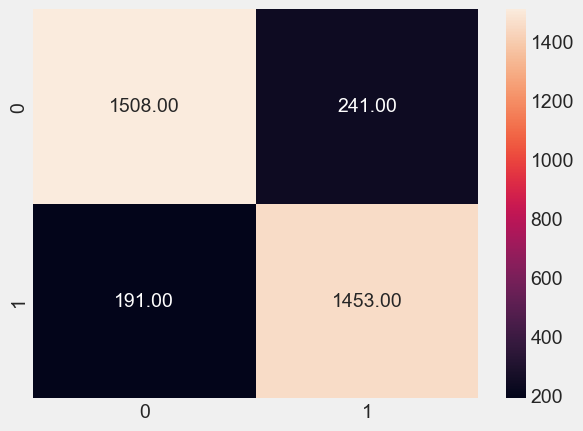

In [544]:
def cal(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy=accuracy_score(pred,y_test)
    recall=recall_score(pred,y_test)
    precision=precision_score(pred,y_test)
    f1=f1_score(pred,y_test)

    result1.append(accuracy)
    result2.append(recall)
    result3.append(precision)
    result4.append(f1)

    sns.heatmap(confusion_matrix(pred,y_test),fmt='.2f',annot=True)
    print(model)
    print(f'accuracy: {accuracy} , recall: {recall} , precision: {precision} , f1: {f1}')

cal(model1)






SVC(kernel='linear', probability=True)
accuracy: 0.8815207780725022 , recall: 0.8840665873959572 , precision: 0.8778040141676505 , f1: 0.8809241706161137


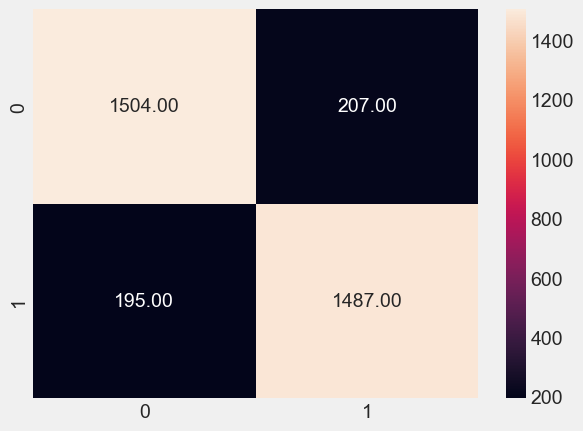

In [545]:
cal(model2)

KNeighborsClassifier()
accuracy: 0.8511641615089891 , recall: 0.8430467397576457 , precision: 0.8624557260920898 , f1: 0.8526407936971112


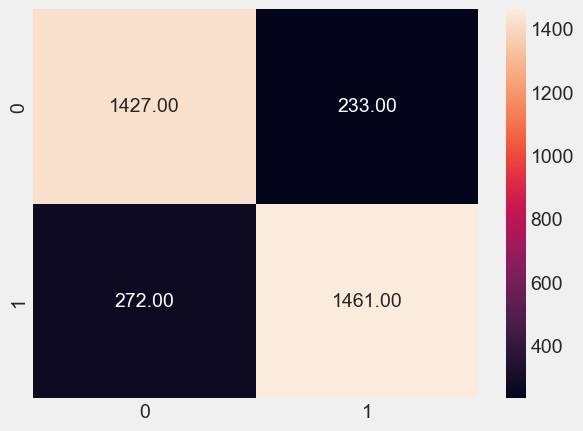

In [546]:
cal(model3)


DecisionTreeClassifier()
accuracy: 0.8703212496315944 , recall: 0.8620092378752887 , precision: 0.8813459268004723 , f1: 0.8715703444249854


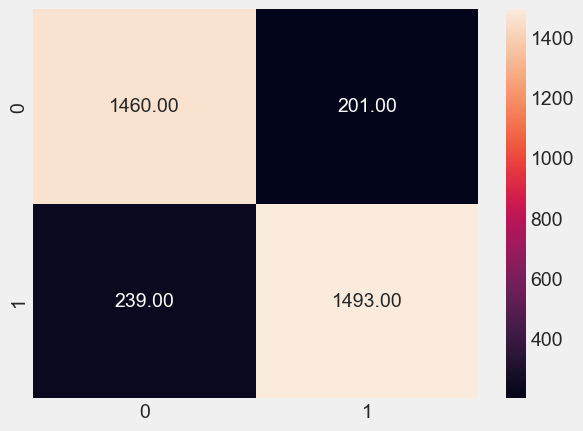

In [547]:
cal(model4)

GaussianNB()
accuracy: 0.8255231358679634 , recall: 0.877914951989026 , precision: 0.755608028335301 , f1: 0.8121827411167513


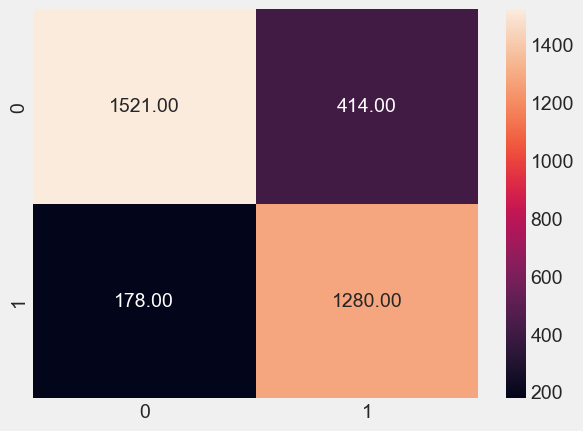

In [548]:
cal(model5)

RandomForestClassifier(n_estimators=1000, random_state=41)
accuracy: 0.8989095195991748 , recall: 0.8934187536400698 , precision: 0.9055489964580874 , f1: 0.8994429785986514


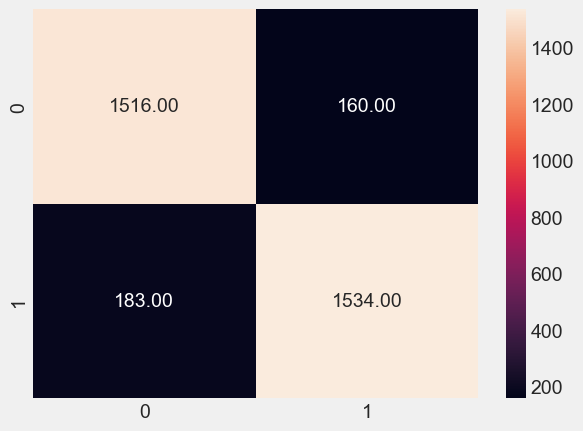

In [549]:
cal(model6)

GradientBoostingClassifier(n_estimators=2000)
accuracy: 0.9021514883583849 , recall: 0.8954703832752613 , precision: 0.910271546635183 , f1: 0.9028103044496487


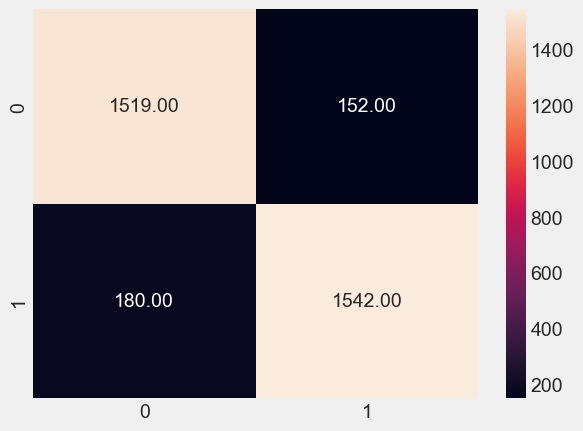

In [550]:
cal(model7)

In [551]:
final_result=pd.DataFrame({'algorithms':col,'accuracies':result1,'recall':result2,'presicion':result3,'f1':result4 })


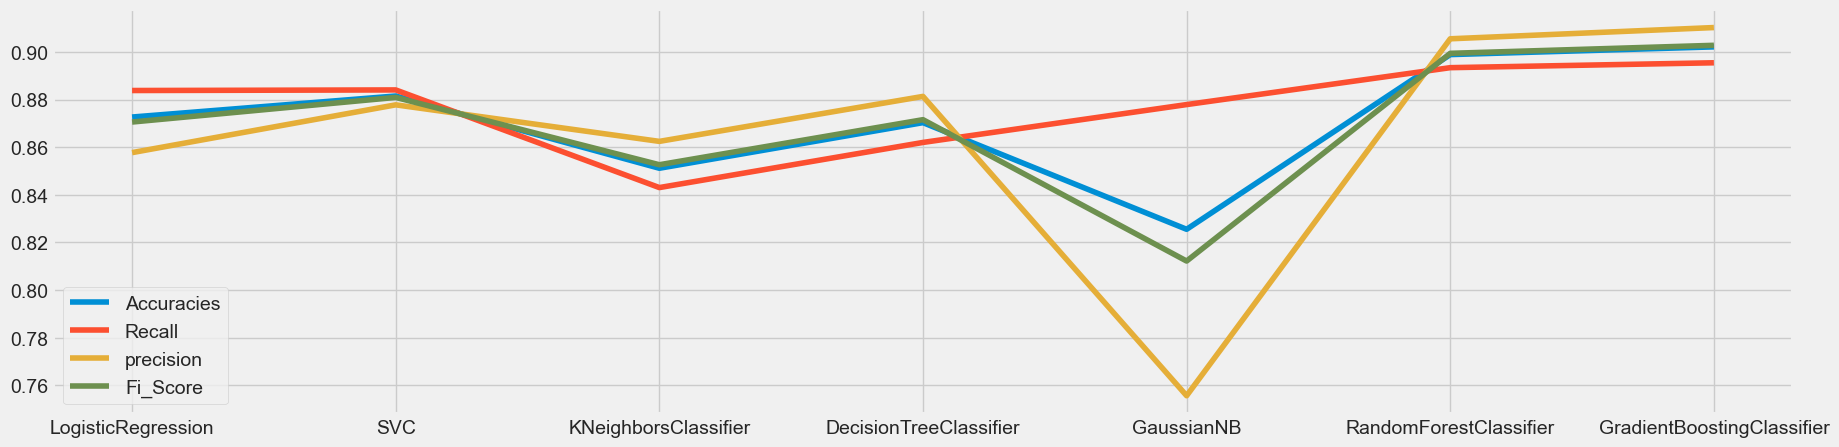

In [552]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final_result.algorithms,result1, label='Accuracies')
plt.plot(final_result.algorithms,result2 , label='Recall')
plt.plot(final_result.algorithms,result3 , label='precision')
plt.plot(final_result.algorithms,result4 , label='Fi_Score')
plt.legend()
plt.show()